In [1684]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [1685]:
# load package for loading data
import pandas as pd

In [1686]:
housing_dataset = 'boston_housing.csv'
housing_dataset = pd.read_csv(housing_dataset)
housing_dataset

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [1687]:
#Check null-value
housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [1688]:
X = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [1689]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [1690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

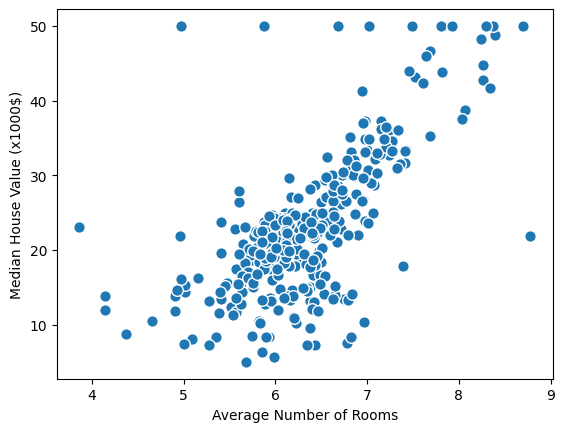

In [1691]:
# visualize data
#import library
import matplotlib.pyplot as plt
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [1692]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]
    
    def fit(self, X, y):
        pass

### Gradient Descent

In [1693]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.001, max_iter=200, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.costs = []
        
        for iter_i in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred

            self.w[0] += self.eta*np.sum(diff)
            self.w[1:] += self.eta*np.dot(X.T, diff)
            J = 1/2 * np.sum(diff**2)
            self.costs.append(J)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

<span style="font-size: larger;"> **Gi√° tr·ªã ph√π h·ª£p nh·∫•t c·ªßa 'learning rate' l√† 1e-4, v√¨:**</span>

- eta hay 'learning rate' l√† m·ªôt trong nh·ªØng hyperparameters c·ªßa thu·∫≠t to√°n Linear Regression, v√¨ v·∫≠y n√≥ r·∫•t quan tr·ªçng v√¨ ·∫£nh h∆∞·ªüng tr·ª±c ti·∫øp t·ªõi ƒë·ªô ch√≠nh x√°c c·ªßa model. Trong model, eta th∆∞·ªùng l√† s·ªë r·∫•t nh·ªè v√¨ n·∫øu qu√° l·ªõn m√¥ h√¨nh s·∫Ω kh√¥ng h·ªôi t·ª• v√† ƒëi v·ªÅ ƒëi·ªÉm t·ªëi ∆∞u, c√≤n qu√° nh·ªè th√¨ s·∫Ω t·ªën chi ph√≠ ch·∫°y nhi·ªÅu b∆∞·ªõc iterations.
- eta = 1e-2 ho·∫∑c 1e-3 ƒë·ªÅu l√† nh·ªØng learning rate l·ªõn khi·∫øn model b·ªã Gradient Exploding, Oscillations, Non-convergence, Divergence ho·∫∑c NaN values.
- Khi thay eta 1e-2, 1e-3 khi·∫øn gi√° tr·ªã cost tƒÉng cao ƒë·ªôt ng·ªôt ·ªü m·ªôt s·ªë kho·∫£ng epochs, nh·ªØng kho·∫£ng c√≤n l·∫°i g·∫ßn nh∆∞ b·∫±ng kh√¥ng. ƒê√¢y l√† ƒëi·ªÅu b·∫•t th∆∞·ªùng ch·ª©ng t·ªè c√≥ l·ªói trong qu√° tr√¨nh hu·∫•n luy·ªán. C√≤n eta = 1e-4 th√¨ ƒë·ªì th·ªã gi·∫£m ƒë·ªÅu ch·ª©ng t·ªè m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët.


In [1694]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train,y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

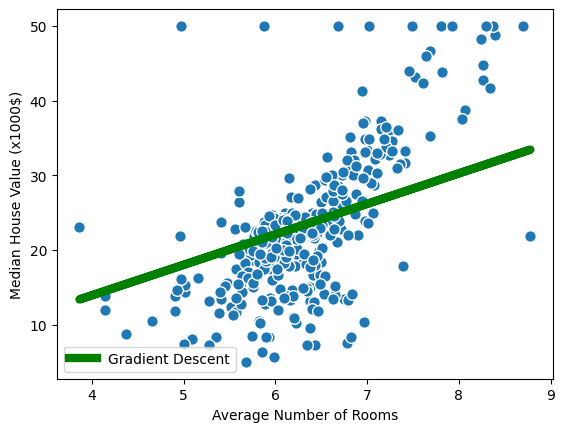

In [1695]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [1696]:
class SGD(LinearRegression):
    def __init__(self, eta=0.01, max_iter=1000, batch_size=32, tol=1e-3, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.tol = tol
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        for epoch in range(self.max_iter):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X.iloc[indices].reset_index(drop=True)
            y = y.iloc[indices].reset_index(drop=True)

            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X.iloc[i:i + self.batch_size]
                y_batch = y.iloc[i:i + self.batch_size]

                y_pred = self.predict(X_batch)
                diff = y_batch - y_pred

                grad_w = -2 * np.dot(X_batch.T, diff) / X_batch.shape[0]
                grad_b = -2 * np.sum(diff) / X_batch.shape[0]

                self.w[1:] -= self.eta * grad_w
                self.w[0] -= self.eta * grad_b

            # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng s·ªõm
            if np.linalg.norm(grad_w) < self.tol and np.abs(grad_b) < self.tol:
                print(f"Converged at epoch {epoch}")
                break


- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [1697]:
# Initialize the model
reg_SGD = SGD(eta=1e-4, max_iter=200,random_state=42)

# Train model
reg_SGD.fit(X_train,y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

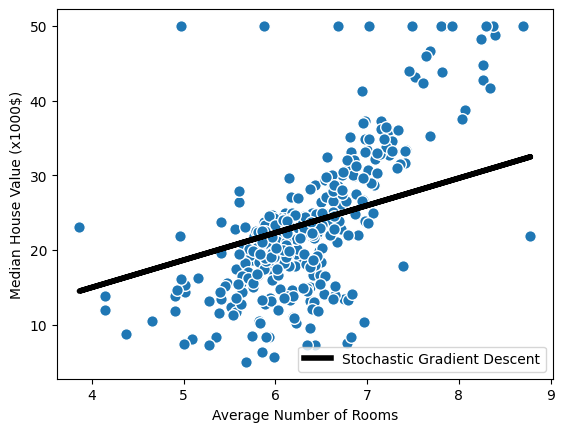

In [1698]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [1699]:
from sklearn.linear_model import LinearRegression

In [1700]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

In [1701]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

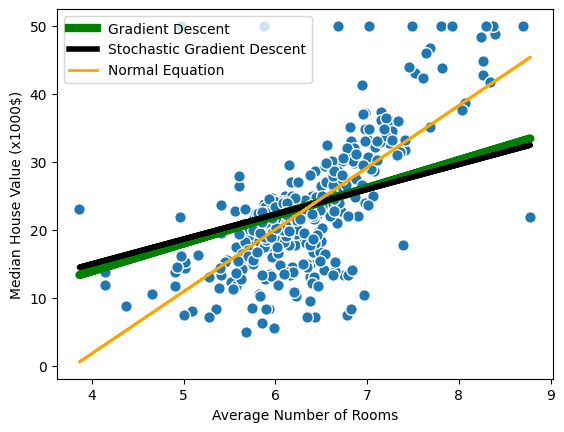

In [1702]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [1703]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[0.35840934 3.65675288]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [1704]:
y_pred_GD = reg_GD.predict(X_test)

In [1705]:
y_pred_SGD = reg_SGD.predict(X_test)

In [1706]:
y_pred_NE = reg_NE.predict(X_test)

In [1707]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [1708]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.423535
MAE of NE: 4.314224


In [1709]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.760089
MSE of NE: 40.35145


In [1710]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.265094
R2 of NE: 0.458465


## Experiment with Standardized Data

In [1711]:
# Re-load the dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [1712]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [1713]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [1714]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [1715]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

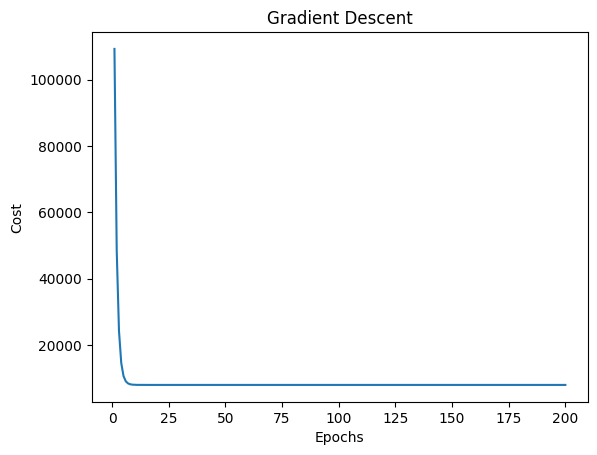

In [1716]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



In [1717]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [1718]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGD(eta=1e-3, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


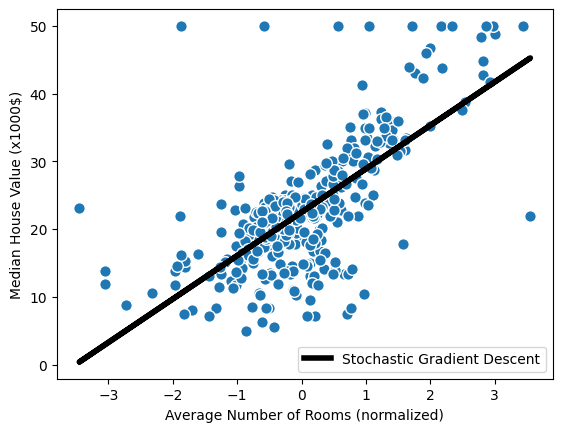

In [1719]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [1720]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

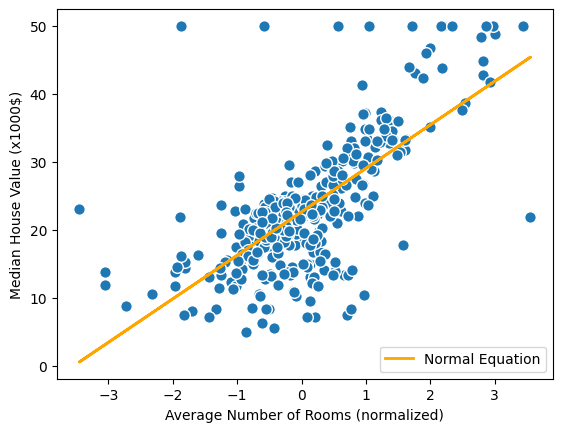

In [1721]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

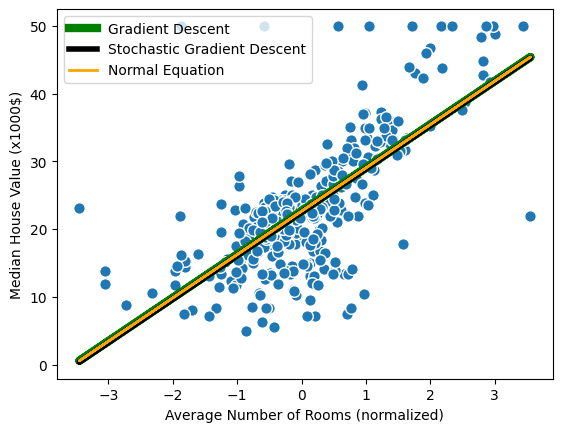

In [1722]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [1723]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [1724]:
w_SGD = reg_SGD.w
w_SGD

array([22.48791494,  6.40776756])

In [1725]:
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
w_NE

array([22.64163118,  6.40020122])

In [1726]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [1727]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [1728]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [1729]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.304823
MAE of NE: 4.314224


In [1730]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.264637
MSE of NE: 40.35145


In [1731]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.45963
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [1732]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [1733]:
X = housing_dataset.drop(columns='MEDV',axis=1)
y = housing_dataset['MEDV']

In [1734]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

**Gi√° tr·ªã ph√π h·ª£p l√† 1e-8 v√¨ khi eta=1e-8 gi√° tr·ªã cost gi·∫£m d·∫ßn ƒë·ªÅu, ƒë√¢y l√† d·∫•u hi·ªáu m√¥ h√¨nh ƒëang h·ªçc t·ªët. C√≤n c√°c gi√° tr·ªã eta kh√°c qu√° cao khi·∫øn cho model b·ªã Gradient Exploding, Oscillations, Non-convergence, Divergence ho·∫∑c NaN values.**

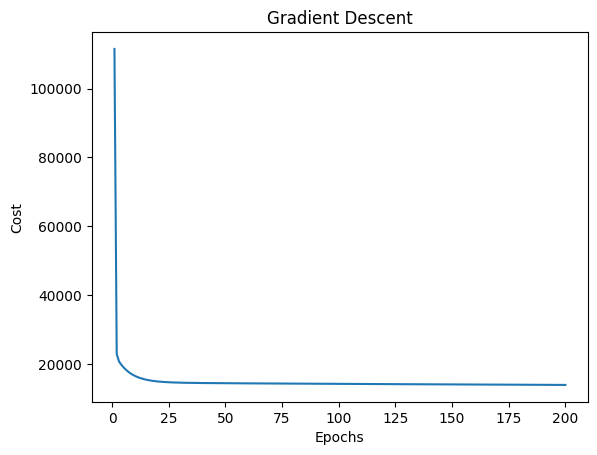

In [1735]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

**Khi gi·∫£i quy·∫øt b√†i to√°n multi linear regression, em nh·∫≠n th·∫•y model em t·ª± c√†i ƒë·∫∑t kh√¥ng c√≤n ƒë∆∞·ª£c ƒë√°nh gi√° t·ªët n√™n em s·∫Ω s·ª≠ d·ª•ng package c·ªßa sklearn**

In [1736]:
from sklearn.linear_model import SGDRegressor
# Initialize the SGD model
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

### Normal Equation

In [1737]:
# Add the '1' column to data
X_train_NE = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

In [1738]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_NE, y_train)

LinearRegression()

### Algorithms Comparisons

In [1739]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [1740]:
w_SGD = np.hstack([reg_SGD.intercept_, reg_SGD.coef_])
w_SGD

array([-2.44296481e+10, -1.95396370e+11,  4.08295818e+11, -2.86228380e+10,
       -2.45052946e+10, -5.51741048e+09, -1.86074073e+11, -2.26531137e+11,
       -4.83164203e+11,  4.58609280e+11,  4.12399638e+11, -2.33768015e+11,
       -2.82469328e+11,  3.66111352e+11])

In [1741]:
w_NE = np.hstack([reg_NE.intercept_, reg_NE.coef_])
w_NE

array([ 3.16310840e+01,  0.00000000e+00, -1.33470103e-01,  3.58089136e-02,
        4.95226452e-02,  3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
       -1.08208352e-02, -1.38599824e+00,  2.42727340e-01, -8.70223437e-03,
       -9.10685208e-01,  1.17941159e-02, -5.47113313e-01])

In [1742]:
y_pred_GD = reg_GD.predict(X_test)

In [1743]:
y_pred_SGD = reg_SGD.predict(X_test)

In [1744]:
y_pred_NE = reg_NE.predict(np.hstack([np.ones((X_test.shape[0], 1)), X_test]))

In [1745]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 71601284959196.69
MAE of NE: 3.16271


In [1746]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 1.1319731421309066e+28
MSE of NE: 21.517444


In [1747]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: -1.5191599993317923e+26
R2 of NE: 0.711226


## Experiment with Standardized Data

In [1748]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [1749]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [1750]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [1751]:
X_new = housing_dataset.drop(columns='MEDV',axis=1)
y = housing_dataset['MEDV']

In [1752]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

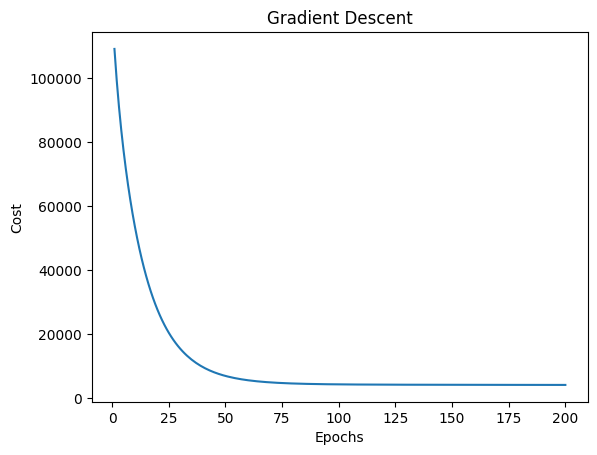

In [1753]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [1754]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

c:\Users\hieut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [1755]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [1756]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [1757]:
w_SGD = np.hstack([reg_SGD.intercept_, reg_SGD.coef_])
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [1758]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [1759]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [1760]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [1761]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [1762]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [1763]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [1764]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

**ƒê·ªãnh nghƒ©a**: H·ªá s·ªë $R^2$ c√≤n g·ªçi l√† h·ªá s·ªë x√°c ƒë·ªãnh, l√† m·ªôt ch·ªâ s·ªë th·ªëng k√™ th·ªÉ hi·ªán m·ª©c ƒë·ªô ph√π h·ª£p c·ªßa m√¥ h√¨nh h·ªìi quy v·ªõi d·ªØ li·ªáu. N√≥ bi·ªÉu th·ªã t·ª∑ l·ªá ph·∫ßn trƒÉm bi·∫øn thi√™n c·ªßa bi·∫øn ph·ª• thu·ªôc ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi c√°c bi·∫øn ƒë·ªôc l·∫≠p trong m√¥ h√¨nh. <br>
<br>
**C√¥ng th·ª©c t√≠nh:**
$ 
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} 
$ <br>
*Trong ƒë√≥:* 
- $RSS=\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ l√† T·ªïng b√¨nh ph∆∞∆°ng c√°c ph·∫ßn d∆∞ (Residual Sum of Squares), ƒëo l∆∞·ªùng t·ªïng c√°c kho·∫£ng c√°ch b√¨nh ph∆∞∆°ng gi·ªØa c√°c gi√° tr·ªã th·ª±c t·∫ø v√† c√°c gi√° tr·ªã d·ª± ƒëo√°n t·ª´ m√¥ h√¨nh.
- $TTS=\sum_{i=1}^{n} (y_i - \bar{y})^2$ l√† T·ªïng b√¨nh ph∆∞∆°ng c√°c sai s·ªë t·ªïng c·ªông (Total Sum of Squares), ƒëo l∆∞·ªùng t·ªïng c√°c kho·∫£ng c√°ch b√¨nh ph∆∞∆°ng gi·ªØa c√°c gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã trung b√¨nh c·ªßa d·ªØ li·ªáu.<br>

**√ù nghƒ©a:** Ch·ªâ s·ªë n√†y ƒëo l∆∞·ªùng t·ª∑ l·ªá bi·∫øn thi√™n c·ªßa d·ªØ li·ªáu m√† m√¥ h√¨nh c√≥ th·ªÉ gi·∫£i th√≠ch ƒë∆∞·ª£c, v·ªõi gi√° tr·ªã t·ª´ 0 ƒë·∫øn 1, trong ƒë√≥ 1 bi·ªÉu th·ªã r·∫±ng m√¥ h√¨nh ho√†n to√†n ph√π h·ª£p v·ªõi d·ªØ li·ªáu v√† 0 bi·ªÉu th·ªã kh√¥ng c√≥ ƒë·ªô ph√π h·ª£p.
- $ R^2 = 1 $: M√¥ h√¨nh kh·ªõp ho√†n to√†n v·ªõi d·ªØ li·ªáu.
- $ R^2 = 0 $: M√¥ h√¨nh kh√¥ng gi·∫£i th√≠ch ƒë∆∞·ª£c b·∫•t k·ª≥ bi·∫øn ƒë·ªông n√†o trong d·ªØ li·ªáu.
- $ R^2 \in (0, 1) $: M√¥ h√¨nh c√≥ m·ªôt m·ª©c ƒë·ªô kh·ªõp nh·∫•t ƒë·ªãnh, nh∆∞ng kh√¥ng ho√†n h·∫£o.
- $R^2 <0 $: M√¥ h√¨nh k√©m hi·ªáu qu·∫£, c√≥ th·ªÉ l√† do sai m√¥ h√¨nh, d·ªØ li·ªáu c√≥ v·∫•n ƒë·ªÅ, t√≠nh to√°n kh√¥ng ch√≠nh x√°c ho·∫∑c Overfitting. C·∫ßn c·∫£i thi·ªán m√¥ h√¨nh.<br>

**V√≠ d·ª•:**
Gi·∫£ s·ª≠ ch√∫ng ta mu·ªën d·ª± ƒëo√°n s·ªë ƒëi·ªÉm ki·ªÉm tra c·ªßa sinh vi√™n d·ª±a tr√™n s·ªë gi·ªù h·ªçc:
- N·∫øu $ùëÖ^2=0.9$, c√≥ nghƒ©a l√† 90% bi·∫øn ƒë·ªông trong ƒëi·ªÉm s·ªë ki·ªÉm tra ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi m√¥ h√¨nh c·ªßa ch√∫ng ta. Nh∆∞ v·∫≠y, m√¥ h√¨nh d·ª± ƒëo√°n l√† t∆∞∆°ng ƒë·ªëi ch√≠nh x√°c, v√† s·ªë gi·ªù h·ªçc l√† y·∫øu t·ªë quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn ƒëi·ªÉm s·ªë.
- N·∫øu $R^2=0.3$, ch·ªâ 30% bi·∫øn ƒë·ªông trong ƒëi·ªÉm s·ªë ki·ªÉm tra ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi m√¥ h√¨nh. ƒêi·ªÅu n√†y c√≥ th·ªÉ ng·ª• √Ω r·∫±ng ngo√†i gi·ªù h·ªçc, c√≥ c√°c y·∫øu t·ªë kh√°c quan tr·ªçng h∆°n (nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, th·ªÉ tr·∫°ng tinh th·∫ßn) m√† m√¥ h√¨nh ch∆∞a n·∫Øm b·∫Øt ƒë∆∞·ª£c.<br>

**M·ªôt s·ªë l∆∞u √Ω khi s·ª≠ d·ª•ng $R^2$:**
- Kh√¥ng ph·∫£n √°nh ch·∫•t l∆∞·ª£ng d·ª± ƒëo√°n ·ªü m·ªçi tr∆∞·ªùng h·ª£p: $ùëÖ^2$ cao kh√¥ng lu√¥n ƒë·∫£m b·∫£o m√¥ h√¨nh t·ªët v√¨ c√≥ th·ªÉ do "qu√° kh·ªõp" (overfitting) v·ªõi d·ªØ li·ªáu nhi·ªÖu.

- Kh√¥ng ph√π h·ª£p cho t·∫•t c·∫£ lo·∫°i m√¥ h√¨nh: $ùëÖ^2$ th∆∞·ªùng ch·ªâ √°p d·ª•ng cho h·ªìi quy tuy·∫øn t√≠nh, trong khi c√°c m√¥ h√¨nh kh√°c c√≥ th·ªÉ c·∫ßn c√°c ch·ªâ s·ªë kh√°c, nh∆∞ AUC-ROC cho ph√¢n lo·∫°i.

- Kh√¥ng so s√°nh gi·ªØa c√°c t·∫≠p d·ªØ li·ªáu kh√°c nhau: $ùëÖ^2$ ch·ªâ n√™n so s√°nh gi·ªØa c√°c m√¥ h√¨nh d·ª± ƒëo√°n tr√™n c√πng m·ªôt t·∫≠p d·ªØ li·ªáu.

- C√≥ th·ªÉ b·ªã ·∫£nh h∆∞·ªüng b·ªüi s·ªë bi·∫øn ƒë·∫ßu v√†o: Khi c√≥ nhi·ªÅu bi·∫øn, $ùëÖ^2$ c√≥ th·ªÉ tƒÉng do s·ªë bi·∫øn l·ªõn, kh√¥ng nh·∫•t thi·∫øt l√† m√¥ h√¨nh t·ªët h∆°n. Khi ƒë√≥, d√πng $ùëÖ^2$ ƒëi·ªÅu ch·ªânh s·∫Ω ph√π h·ª£p h∆°n.